/srv/home/xihua/Key_Product_Metrics
Generating Pageview Access Method chart...


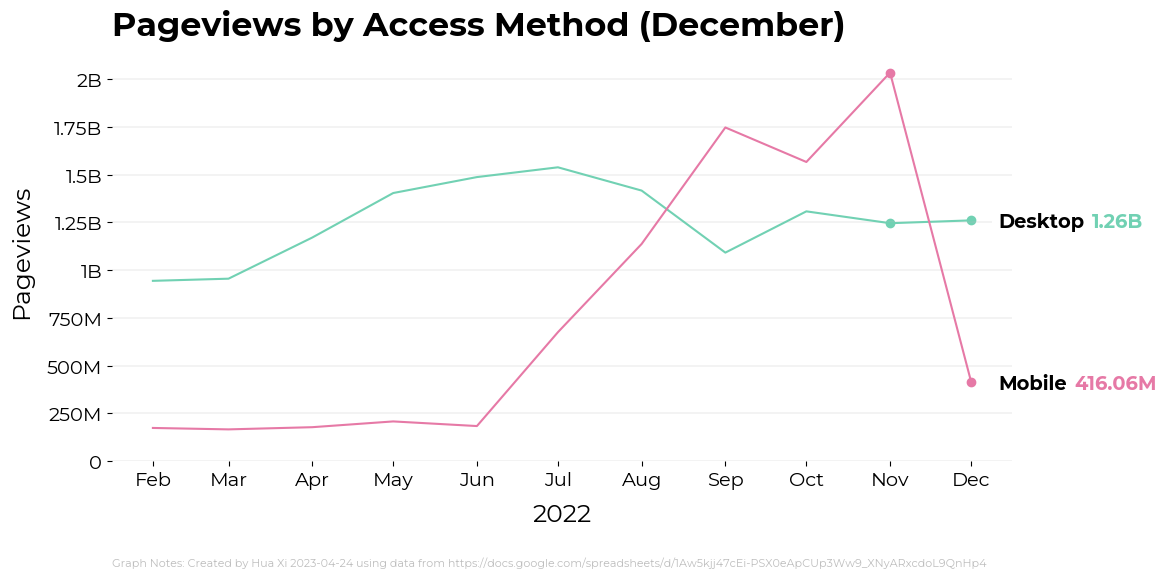

In [1]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import os
from os.path import dirname
import pandas as pd
import re
%cd ..
%run wikicharts.ipynb

def main():
    print("Generating Pageview Access Method chart...")

    #---SET PARAMETERS---
    #get current path
    home_dir = os.getcwd()
    outfile_name = "Pageviews_Access_Method.png"
    yoy_note = " "
    display_flag = False
    save_file_name = home_dir + "/charts/" + outfile_name

    #---CLEAN DATA--
    #read in data
    df = pd.read_csv(home_dir + '/resources/data/pageviews_access_method.csv', sep=',')

    start_date = "2022-02-01"
    end_date = datetime.datetime.today()

    #convert string to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.sort_values(by='timestamp')

    #truncate to preferred date range
    df = df[df["timestamp"].isin(pd.date_range(start_date, end_date))]

    #long to wide
    df = pd.pivot(df, index = 'timestamp', columns='access_method', values='sum_view_count')
    df = df.reset_index()     
    df = df.rename_axis(None, axis=1)
    df = df.rename(columns={'mobile web':'mobile_web'})

    #subset to highlight the last two months
    mom_highlight = pd.concat([df.iloc[-2,:],df.iloc[-1,:]],axis=1).T

    #---PLOT---
    chart = Wikichart(start_date,end_date,df,time_col='timestamp')
    chart.init_plot(width=12)
    #plot lines
    plt.plot(df.timestamp, df.desktop,label='_nolegend_',color=wmf_colors['brightgreen'])
    plt.plot(df.timestamp, df.mobile_web,label='_nolegend_',color=wmf_colors['pink'])
    #plot mom highlights
    plt.scatter(mom_highlight.timestamp, mom_highlight.desktop,label='_nolegend_',color=wmf_colors['brightgreen'])
    plt.scatter(mom_highlight.timestamp, mom_highlight.mobile_web,label='_nolegend_',color=wmf_colors['pink'])
    #plot monthly highlights
    chart.format(title = f'Pageviews by Access Method',
        format_x_yearly=False,
        format_x_monthly=True,
        radjust=0.85,
        badjust=0.2,
        ladjust=0.1,
        data_source="https://docs.google.com/spreadsheets/d/1Aw5kjj47cEi-PSX0eApCUp3Ww9_XNyARxcdoL9QnHp4")
    #add x, y axis labels
    plt.xlabel("2022",font='Montserrat', fontsize=18, labelpad=10)
    plt.ylabel("Pageviews",font='Montserrat', fontsize=18,labelpad=10)
    chart.annotate(x='timestamp',
        y='desktop',
        legend_label="Desktop",
        num_color=wmf_colors['brightgreen'],
        num_annotation=chart.calc_finalcount(y='desktop',yoy_note=yoy_note))
    chart.annotate(x='timestamp',
        y='mobile_web',
        legend_label="Mobile",
        num_color=wmf_colors['pink'],
        num_annotation=chart.calc_finalcount(y='mobile_web',yoy_note=yoy_note))
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()